In [1]:
!pip install tensorflow keras numpy pandas

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/377.1 MB 12.8 MB/s eta 0:00:30
   ---------------------------------------- 1.2/377.1 MB 15.1 MB/s eta 0:00:25
   ---------------------------------------- 1.9/377.1 MB 15.2 MB/s eta 0:00:25
   ---------------------------------------- 2.9/377.1 MB 16.6 MB/s eta 0:00:23
   ---------------------------------------- 3.7/377.1 MB 17.0 MB/s eta 0:00:22
   ---------------------------------------- 4.6/377.1 MB 17.2 MB/s eta 0:00:22
    --------------------------------------- 5.3/377.1 MB 16.8 MB/s eta 0:00:23
    --------------------------------------- 6.0/377.1 MB 16.6 MB/s eta 0:00:23
    --------------------------------------- 6.6/377.1 MB 16.3 MB/s eta 0:00:23
    --------------------------------------- 7.6/377.1 MB 16.7 MB/s

In [14]:
!pip install opencv-python
!pip install scikit-learn

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.6/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.6 MB 6.8 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.6 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.6 MB 8.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.6 MB 8.5 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.6 MB 8.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.3/38.6 MB 9.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.6 MB 9.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.6 MB 9.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.6 MB 9.9 MB/s eta 0:00:04
   ------ ---

In [12]:
!pip install Pillow matplotlib

In [2]:
#importing necessary packages

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2

In [3]:
"""
Working with CelebA dataset:
list_bbox_celeba - bounding box annotations (box which specifies region containing the face) for each image in the dataset
list_eval_partition - tells which set does an image belong to (0-training, 1-validation, 2-test)
list_landmarks_align_celeba - facial landmark annotations (landmarks are specific points on the face - eyes, nose etc) for each image
list_attr_celeba - contains binary attribute annotations for each image (gender, smile etc)
"""

#reading all the CelebA CSVs
bbox_df = pd.read_csv(r'D:\Rohan\ML\Datasets\CelebA\list_bbox_celeba.csv')
partition_df = pd.read_csv(r'D:\Rohan\ML\Datasets\CelebA\list_eval_partition.csv')
landmarks_df = pd.read_csv(r'D:\Rohan\ML\Datasets\CelebA\list_landmarks_align_celeba.csv')
attr_df = pd.read_csv(r'D:\Rohan\ML\Datasets\CelebA\list_attr_celeba.csv')

In [4]:
bbox_df.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [5]:
#merging all the important information of CelebA images
celeba_merged = pd.merge(bbox_df, partition_df, on='image_id')
celeba_merged = pd.merge(celeba_merged, landmarks_df, on='image_id')
celeba_merged = pd.merge(celeba_merged, attr_df, on='image_id')

from IPython.display import display
pd.options.display.max_columns = None

celeba_merged.head()
#1 means present, -1 means not present

,image_id,x_1,y_1,width,height,partition,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,95,71,226,313,0,69,109,106,113,77,142,73,152,108,154,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,72,94,221,306,0,69,110,107,112,81,135,70,151,108,153,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,216,59,91,126,0,76,112,104,106,108,128,74,156,98,158,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,622,257,564,781,0,72,113,108,108,101,138,71,155,101,151,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,236,109,120,166,0,66,114,112,112,86,119,71,147,104,150,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
celeba_merged.columns.values

array(['image_id', 'x_1', 'y_1', 'width', 'height', 'partition',
       'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y', 'nose_x',
       'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y', '5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
       'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'], dtype=object)

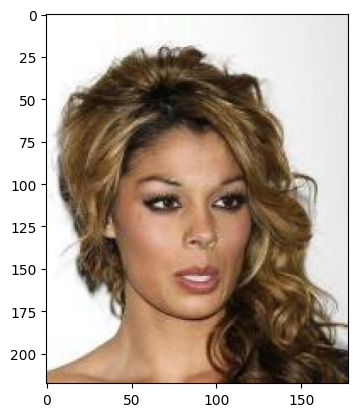

In [7]:
#loading the CelebA dataset
import os
from PIL import Image
import matplotlib.pyplot as plt

celeba_images = 'D:/Rohan/ML/Datasets/CelebA/img_align_celeba/img_align_celeba'

def load_celeba_image(image_id):
    image_path = os.path.join(celeba_images, image_id) #joins the celeba image directory path and the image name
    image = Image.open(image_path)
    return image

example_image_id = celeba_merged.loc[5, 'image_id']
example_image = load_celeba_image(example_image_id)
plt.imshow(example_image)
plt.show()

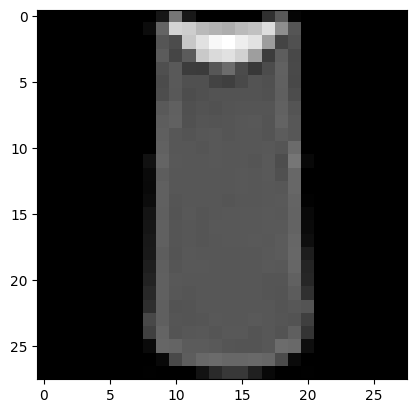

In [8]:
#loading the Fashion MNIST dataset

import struct

def read_idx(filename):
    """Reads an IDX file and returns it as a NumPy array."""
    with open(filename, 'rb') as f:
        magic, = struct.unpack('>I', f.read(4))
        if magic == 2051:
            num_images, rows, cols = struct.unpack('>III', f.read(12))
            data = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
        elif magic == 2049:
            num_items, = struct.unpack('>I', f.read(4))
            data = np.fromfile(f, dtype=np.uint8)
        else:
            raise ValueError('Invalid magic number in IDX file: {}'.format(magic))
        return data

# Paths to the Fashion MNIST files
fashion_mnist_files = {
    'train_images': r"D:\Rohan\ML\Datasets\Fashion MNIST\train-images-idx3-ubyte",
    'train_labels': r"D:\Rohan\ML\Datasets\Fashion MNIST\train-labels-idx1-ubyte",
    'test_images': r"D:\Rohan\ML\Datasets\Fashion MNIST\t10k-images-idx3-ubyte",
    'test_labels': r"D:\Rohan\ML\Datasets\Fashion MNIST\t10k-labels-idx1-ubyte"
}

# Load Fashion MNIST data
train_images = read_idx(fashion_mnist_files['train_images'])
train_labels = read_idx(fashion_mnist_files['train_labels'])
test_images = read_idx(fashion_mnist_files['test_images'])
test_labels = read_idx(fashion_mnist_files['test_labels'])

# Example: Display a Fashion MNIST image
plt.imshow(train_images[2], cmap='gray')
plt.show()

In [9]:
fashion_mnist_categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#                                0             1          2          3       4        5         6         7        8          9

In [10]:
#Defining criteria for matchmaking

def determine_style_category(row):
    if row['5_o_Clock_Shadow'] ==1 and row['Arched_Eyebrows']==1 and row['Mustache']==1 and row["Male"]==1:
        return 'Rugged Casual Male'
    if row['5_o_Clock_Shadow'] ==1 and row['Arched_Eyebrows']==1 and row['Mustache']==1 and row["Male"]==-1:
        return 'Rugged Casual Female'
        
    if row['Big_Lips'] ==1 and row['Heavy_Makeup']==1 and row['Wearing_Lipstick']==1 and row["Male"]==1:
        return 'Glamorous Male'
    if row['Big_Lips'] ==1 and row['Heavy_Makeup']==1 and row['Wearing_Lipstick']==1 and row["Male"]==-1:
        return 'Glamorous Female'

    if row['Black_Hair'] ==1 and row['Wearing_Hat']==1 and row['Wearing_Necktie']==1 and row["Male"]==1:
        return 'Dapper Male'
    if row['Black_Hair'] ==1 and row['Wearing_Hat']==1 and row['Wearing_Necktie']==1 and row["Male"]==-1:
        return 'Dapper Female'

    if row['Black_Hair'] ==1 and row['Smiling']==1 and row['Wearing_Earrings']==1 and row["Male"]==1:
        return 'Sunny Chic Male'
    if row['Black_Hair'] ==1 and row['Smiling']==1 and row['Wearing_Earrings']==1 and row["Male"]==-1:
        return 'Sunny Chic Female'

    if row['Eyeglasses'] ==1 and row['High_Cheekbones']==1 and row['Receding_Hairline']==1 and row["Male"]==1:
        return 'Intellectual Chic Male'
    if row['Eyeglasses'] ==1 and row['High_Cheekbones']==1 and row['Receding_Hairline']==1 and row["Male"]==-1:
        return 'Intellectual Chic Female'

    if row["Young"]==1:
        return "Casual"
    elif row["Young"]==-1:
        return "Formal"

# Add a new column to merged_df for the style category
celeba_merged['style_category'] = celeba_merged.apply(determine_style_category, axis=1)

# Define mappings from style categories to Fashion MNIST labels
style_to_fashion_mnist = {
    "Rugged Casual Male":[0,1,7],
    "Rugged Casual Female": [0,1,2],
    
    "Glamorous Male":[6,1,9],
    "Glamorous Female": [3,9,4],

    "Dapper Male":[6,1,9],
    "Dapper Female": [6,1,9],

    "Sunny Chic Male":[0,1,7],
    "Sunny Chic Female": [0,1,7],

    "Intellectual Chic Male":[6,1,7],
    "Intellecutal Chic Female": [6,1,7],

    "Casual":[0,1,2],
    "Formal":[6,1,4]
}

In [11]:
celeba_merged.head()

,image_id,x_1,y_1,width,height,partition,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,style_category
0,000001.jpg,95,71,226,313,0,69,109,106,113,77,142,73,152,108,154,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,Casual
1,000002.jpg,72,94,221,306,0,69,110,107,112,81,135,70,151,108,153,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,Casual
2,000003.jpg,216,59,91,126,0,76,112,104,106,108,128,74,156,98,158,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,Casual
3,000004.jpg,622,257,564,781,0,72,113,108,108,101,138,71,155,101,151,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,Casual
4,000005.jpg,236,109,120,166,0,66,114,112,112,86,119,71,147,104,150,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,Glamorous Female


In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
celeba_merged.iloc[0]

image_id               000001.jpg
x_1                            95
y_1                            71
width                         226
height                        313
partition                       0
lefteye_x                      69
lefteye_y                     109
righteye_x                    106
righteye_y                    113
nose_x                         77
nose_y                        142
leftmouth_x                    73
leftmouth_y                   152
rightmouth_x                  108
rightmouth_y                  154
5_o_Clock_Shadow               -1
Arched_Eyebrows                 1
Attractive                      1
Bags_Under_Eyes                -1
Bald                           -1
Bangs                          -1
Big_Lips                       -1
Big_Nose                       -1
Black_Hair                     -1
Blond_Hair                     -1
Blurry                         -1
Brown_Hair                      1
Bushy_Eyebrows                 -1
Chubby        

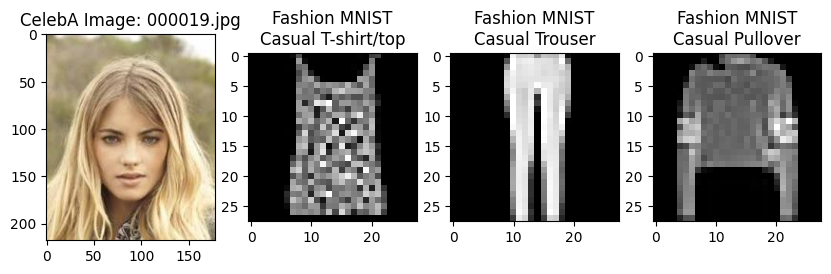

In [16]:
#displaying the celebrity image and the recommended fashion items
def get_fashion_mnist_images(style_category, num_images=1):
    labels = style_to_fashion_mnist[style_category] #getting labels of clothes
    fashion_images = [] #creating an array for storing images of clothes
    fashion_labels = []
    for label in labels: #iterating through labels of clothes
        indices = np.where(train_labels == label)[0] #finding indices of clothes
        selected_indices = np.random.choice(indices, num_images, replace=False) #selecting 1 image randomly from all indices of that type of clothes item
        for index in selected_indices:
            fashion_images.append(train_images[index]) #appending that item's image
            fashion_labels.append(label)
    return fashion_images, fashion_labels


def display_matched_images(image_id):
    image = load_celeba_image(image_id) # getting the image
    style_category = celeba_merged.loc[celeba_merged['image_id'] == image_id, 'style_category'].values[0] # getting the style category of the image
    fashion_images, fashion_labels = get_fashion_mnist_images(style_category, num_images=1) # get 1 image of that fashion item

    #displaying the celebrity
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 4, 1) #plot of 1x4 created
    plt.imshow(image)
    plt.title('CelebA Image: ' + image_id)

    #displaying the suggestions
    #for i, img in enumerate(fashion_images):
    for i, (img, label) in enumerate(zip(fashion_images, fashion_labels)):
        plt.subplot(1, 4, i+2) #indexes of image are 0,1,2
        plt.imshow(img, cmap='gray')
        plt.title(f'Fashion MNIST\n{style_category} {fashion_mnist_categories[label]}')

    plt.show()

# Example: Display matched images for the first CelebA image
# Indexes - 3,4,8,14
example_image_id = celeba_merged.loc[18, 'image_id']
display_matched_images(example_image_id)

In [55]:
"""
Now for the celebrities present in the celebrity dataset we are getting recommendations with the help of style categories set by us.
If a new celebrity is given to us, we should be able to find the characteristics of this image. For this purpose, we will fine tune a VGG16 model
on the CelebA dataset, use the model to generate characteristics, choose the style category based on characteristics and then
suggest Fashion MNIST items.
"""

'\nNow for the celebrities present in the celebrity dataset we are getting recommendations with the help of style categories set by us.\nIf a new celebrity is given to us, we should be able to find the characteristics of this image. For this purpose, we will fine tune a VGG16 model\non the CelebA dataset, use the model to generate characteristics, choose the style category based on characteristics and then\nsuggest Fashion MNIST items.\n'

In [56]:
celeba_merged.shape

(202599, 57)

In [57]:
celeba_merged.columns.values

array(['image_id', 'x_1', 'y_1', 'width', 'height', 'partition',
       'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y', 'nose_x',
       'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y', '5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
       'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young', 'style_category'],
      dtype=object)

In [58]:
celeba_merged.to_csv('celeba_merged.csv')

In [59]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.preprocessing import MinMaxScaler


class CelebADataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = self.data_frame.iloc[idx, 1]  # Assuming 'image_id' is the first column
        img_path = f"{self.root_dir}/{img_name}"
        image = Image.open(img_path).convert('RGB')


        # Extract positional characteristics
        pos_chars = self.data_frame.iloc[idx, 2:17].values.astype('float32')  # Assuming positional columns from 1 to 15 inclusively
        
        pos_scaler = MinMaxScaler()
        pos_scaled = pos_scaler.fit_transform(pos_chars.reshape(-1, 1)).flatten()
        
        pos_chars = torch.tensor(pos_scaled)

        # Extract binary characteristics
        binary_chars = self.data_frame.iloc[idx, 17:57].values.astype('float32')  # Assuming binary columns are from 16 to 55 inclusively


        binary_scaler = MinMaxScaler()
        binary_scaled = binary_scaler.fit_transform(binary_chars.reshape(-1, 1)).flatten()
        #style_category column is not included
        binary_chars = torch.tensor(binary_scaled)

        # Combine both sets of characteristics
        labels = torch.cat((pos_chars, binary_chars))

        if self.transform:
            image = self.transform(image)

        return image, labels

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 178x218 (if needed)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CelebA dataset
celeba_dataset = CelebADataset(csv_file='./celeba_merged.csv',
                                root_dir='D:/Rohan/ML/Datasets/CelebA/img_align_celeba/img_align_celeba',
                                transform=transform)

# Split dataset into train and test
train_size = int(0.8 * len(celeba_dataset))
test_size = len(celeba_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(celeba_dataset, [train_size, test_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [61]:
import torch.nn as nn
import torchvision
import time

# Load pre-trained VGG-16 model
vgg16 = torchvision.models.vgg16(pretrained=True)

# Modify the first layer to accept 178x218 images
#vgg16.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)

# Modify the fully connected layer for the number of output classes
num_positional = 15  # Number of positional characteristics (x, y coordinates)
num_binary = 40  # Number of binary characteristics
vgg16.classifier[6] = nn.Linear(4096, num_positional + num_binary)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# Define loss functions for multi-task learning
def custom_loss(outputs, labels):
    pos_labels = labels[:, :num_positional]
    bin_labels = labels[:, num_positional:]
    
    pos_outputs = outputs[:, :num_positional]
    bin_outputs = outputs[:, num_positional:]
    
    pos_loss = nn.MSELoss()(pos_outputs, pos_labels)
    bin_loss = nn.BCEWithLogitsLoss()(bin_outputs, bin_labels)
    
    return pos_loss + bin_loss

#optimizer = torch.optim.SGD(vgg16.parameters(), lr=0.0001, momentum=0.9)
optimizer = torch.optim.Adam(vgg16.parameters(), lr=0.0001, weight_decay=1e-5)


# Train the model
num_epochs = 1
for epoch in range(num_epochs):
    vgg16.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = vgg16(inputs)
        loss = custom_loss(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(vgg16.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item()
        if i % 5 == 4:    # Print every 5 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5))
            running_loss = 0.0

print('Finished Training')

# Save the trained model
torch.save(vgg16.state_dict(), 'celeba_vgg16.pth')


D:\ProgramFiles\Miniconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\ProgramFiles\Miniconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,     5] loss: 0.861
[1,    10] loss: 0.625
[1,    15] loss: 0.551
[1,    20] loss: 0.512
[1,    25] loss: 0.492
[1,    30] loss: 0.482
[1,    35] loss: 0.494
[1,    40] loss: 0.493
[1,    45] loss: 0.465


KeyboardInterrupt: 

In [ ]:
image_info = celeba_merged.loc[celeba_merged['image_id'] == '177013.jpg']
image_info.head()

In [ ]:
"""
35 hours required by VGG16 to complete one epoch

Since it is taking a long time for training, I have skipped this step.
The next step after fine-tuning would be to simply predict the characteristics of a new unseen celebrity image, assigning a style category based
on characteristics and then giving recommendations by using style_to_fashion_mnist

"""

In [ ]:
#loading the finetuned model
import torch
import torch.nn as nn
from torchvision import models

# Define the model architecture matching the saved model
class CelebAClassifier(nn.Module):
    def __init__(self):
        super(CelebAClassifier, self).__init__()
        self.vgg16 = models.vgg16(pretrained=False)
        num_features = self.vgg16.classifier[6].in_features
        # Assuming you have 15 positional and 40 binary characteristics
        self.vgg16.classifier[6] = nn.Linear(num_features, 55)
    
    def forward(self, x):
        return self.vgg16(x)

# Load the model state
model = CelebAClassifier()
model.load_state_dict(torch.load('celeba_vgg16.pth'))
model.eval()


In [ ]:
#preprocessing the new, unseen celebrity image
from PIL import Image
from torchvision import transforms

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

image_path = 'path_to_your_unseen_image.jpg'
image = preprocess_image(image_path)


In [ ]:
# Making the prediction and storing it in an empty dataframe
with torch.no_grad():
    outputs = model(image)
    outputs = outputs.squeeze().numpy()

# Assuming the first 15 outputs are positional characteristics
positional_predictions = outputs[:15]

# Assuming the next 40 outputs are binary characteristics
binary_predictions = outputs[15:]
binary_predictions = (binary_predictions > 0.5).astype(int)

# Define attribute names
positional_attribute_names = [
    'x_1', 'y_1', 'width', 'height', 'lefteye_x', 'lefteye_y', 
    'righteye_x', 'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 
    'leftmouth_y', 'rightmouth_x', 'rightmouth_y'
]

binary_attribute_names = [
    '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 
    'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 
    'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 
    'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 
    'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 
    'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 
    'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 
    'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'
]

# Combine attribute names and predictions
attribute_names = positional_attribute_names + binary_attribute_names
predictions = list(positional_predictions) + list(binary_predictions)

# Create an empty DataFrame and add the predictions as a new row
df = pd.DataFrame(columns=attribute_names)
df.loc[0] = predictions

In [ ]:
#determining style category based on all characteristics
df['style_category'] = df.apply(determine_style_category, axis=1)

In [ ]:
#displaying the celebrity image and the recommended fashion items
def get_fashion_mnist_images(style_category, num_images=1):
    labels = style_to_fashion_mnist[style_category] #getting labels of clothes
    fashion_images = [] #creating an array for storing images of clothes
    fashion_labels = []
    for label in labels: #iterating through labels of clothes
        indices = np.where(train_labels == label)[0] #finding indices of clothes
        selected_indices = np.random.choice(indices, num_images, replace=False) #selecting 1 image randomly from all indices of that type of clothes item
        for index in selected_indices:
            fashion_images.append(train_images[index]) #appending that item's image
            fashion_labels.append(label)
    return fashion_images, fashion_labels


def display_matched_images(image_id):
    image = load_celeba_image(image_id) # getting the image
    style_category = celeba_merged.loc[celeba_merged['image_id'] == image_id, 'style_category'].values[0] # getting the style category of the image
    fashion_images, fashion_labels = get_fashion_mnist_images(style_category, num_images=1) # get 1 image of that fashion item

    #displaying the celebrity
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 4, 1) #plot of 1x4 created
    plt.imshow(image)
    plt.title('CelebA Image: ' + image_id)

    #displaying the suggestions
    #for i, img in enumerate(fashion_images):
    for i, (img, label) in enumerate(zip(fashion_images, fashion_labels)):
        plt.subplot(1, 4, i+2) #indexes of image are 0,1,2
        plt.imshow(img, cmap='gray')
        plt.title(f'Fashion MNIST\n{style_category} {fashion_mnist_categories[label]}')

    plt.show()

# Example: Display matched images for the first CelebA image
# Indexes - 3,4,8,14
example_image_id = celeba_merged.loc[18, 'image_id']
display_matched_images(example_image_id)

In [ ]:
#Accuracy of classification
import torch
from torch.utils.data import DataLoader

def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Example usage
# Assuming `fine_tuned_vgg16` is your fine-tuned VGG16 model and `test_loader` is your test DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fine_tuned_vgg16.to(device)

test_accuracy = calculate_accuracy(fine_tuned_vgg16, test_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}%')